# Predicting which passengers are transported to an alternate dimension

## 1. Problem Definition

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

***predicting which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system***

## 2. Data

The data for the prediction is given by Kaggle it-self. 
Checkout here:https://www.kaggle.com/competitions/spaceship-titanic/data

* train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
* test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
* sample_submission.csv - A submission file in the correct format.
PassengerId - Id for each passenger in the test set.
Transported - The target. For each passenger, predict either True or False


## 3. Evaluation

Submissions are evaluated based on their classification accuracy, the percentage of predicted labels that are correct.
https://www.kaggle.com/competitions/spaceship-titanic/overview

## 4. Features

* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## Preparing the tools

We're going to use Pandas, Matplotlib and Numpy for data analysis and manipulation.

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# we want our plot to appear inside the notebook
%matplotlib inline 

# Import models for Scikit-Learn
from sklearn.linear_model  import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [2]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [3]:
df_train.shape

(8693, 14)

## Data exploration (exploratory data analysis or EDA)

The goal here is to find out more about data and become a subject matter expert on the dataset you're working with.

In [4]:
df_train["Transported"].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [5]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
df_train.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [8]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<Axes: xlabel='Transported'>

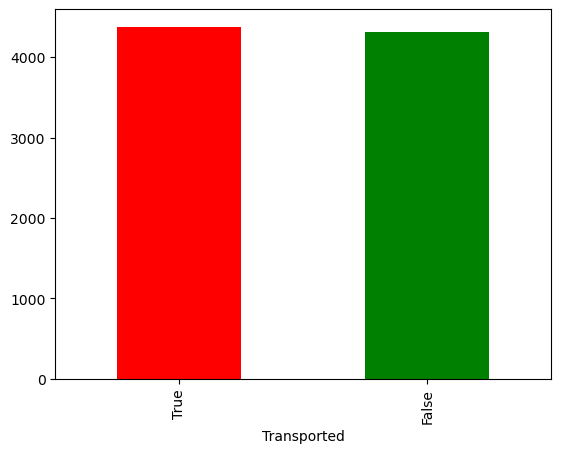

In [9]:
df_train["Transported"].value_counts().plot(kind = "bar", color = ["red", "green"])

## Transportation rate according to HomePlanet

In [10]:

pd.crosstab(df_train.Transported, df_train.HomePlanet)

HomePlanet,Earth,Europa,Mars
Transported,,,
False,2651,727,839
True,1951,1404,920


In [11]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

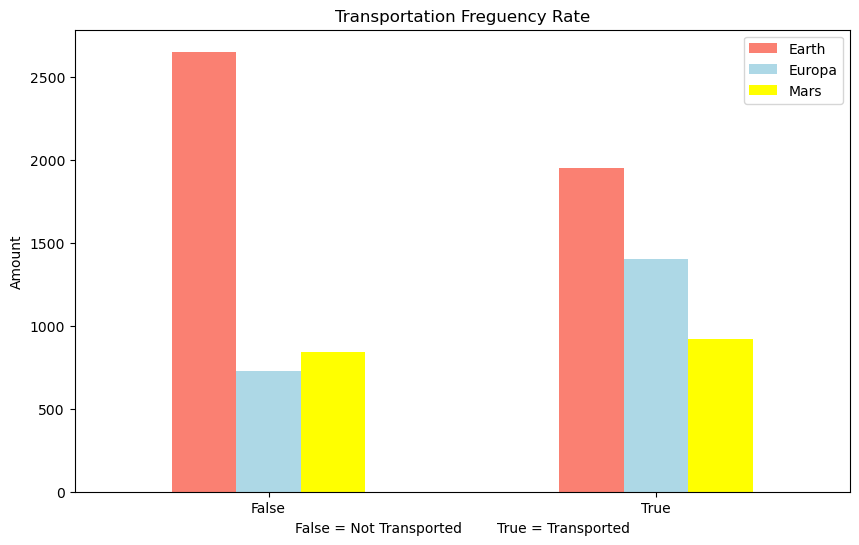

In [12]:
pd.crosstab(df_train.Transported, df_train.HomePlanet).plot(kind = "bar", figsize = (10, 6), color = ["salmon", "lightblue", "yellow"])
plt.title("Transportation Freguency Rate")
plt.xlabel("False = Not Transported        True = Transported")
plt.ylabel("Amount")
plt.legend(["Earth", "Europa", "Mars"])
plt.xticks(rotation = 0);

In [13]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [14]:
pd.crosstab(df_train.Transported, df_train.CryoSleep)

CryoSleep,False,True
Transported,,
False,3650,554
True,1789,2483


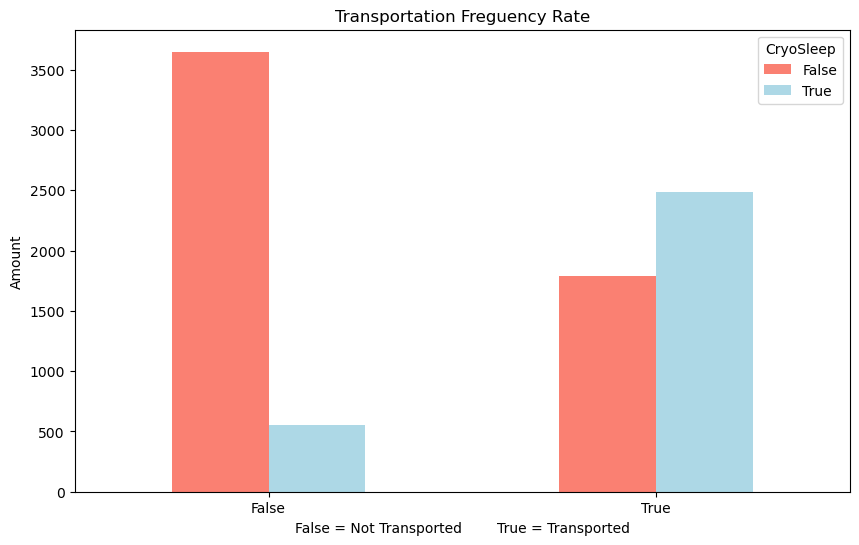

In [15]:
pd.crosstab(df_train.Transported, df_train.CryoSleep).plot(kind = "bar", figsize = (10, 6), color = ["salmon", "lightblue"])
plt.title("Transportation Freguency Rate")
plt.xlabel("False = Not Transported        True = Transported")
plt.ylabel("Amount")
# plt.legend([])
plt.xticks(rotation = 0);

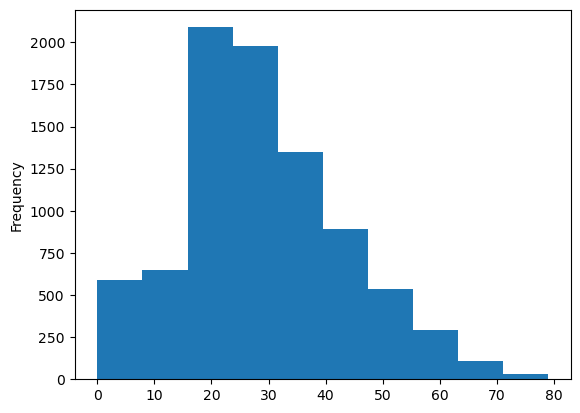

In [16]:
# Check the distribution of the column with a histogram
df_train.Age.plot.hist();

In [17]:
df_train.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [18]:
pd.crosstab(df_train.Transported, df_train.Destination)

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
Transported,,,
False,702,395,3128
True,1098,401,2787


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [20]:
# Find the columns which contains strings
for label, content in df_train.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

PassengerId


In [21]:
df_train.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,8693,8693,0001_01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HomePlanet,8492,3,Earth,4602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CryoSleep,8476,2,False,5439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cabin,8494,6560,G/734/S,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,8511,3,TRAPPIST-1e,5915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,8514.0,NaN,NaN,NaN,28.82793,14.489021,0.0,19.0,27.0,38.0,79.0
VIP,8490,2,False,8291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RoomService,8512.0,NaN,NaN,NaN,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,NaN,NaN,NaN,458.077203,1611.48924,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,NaN,NaN,NaN,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0


In [22]:
# df_train = df

In [23]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## Feature Engineering and Missing Values

In [24]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [25]:
df_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [26]:
# From EDA i've concluded  that PassengerID, Name, Cabin are not affecting much the Transported label
del df_train["PassengerId"]
del df_train["Name"]
del df_train["Cabin"]

del df_test["PassengerId"]
del df_test["Name"]
del df_test["Cabin"]

In [27]:
df_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [28]:
df_test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [29]:
df_train.isna().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [30]:
df_test.isna().sum()

HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [31]:
def ProcessNum(df):
    num_data = df.select_dtypes(['float64']) 
    num_col = list(num_data.columns)
    dict_num = {i:num_col[i] for i in range(len(num_col)) }
    num_data.head()
    imputer = SimpleImputer(strategy='mean')
    d=imputer.fit_transform(num_data)
    temp=pd.DataFrame(d)
    temp = temp.rename(columns=dict_num) 
    return temp

def ProcessObj(df):
    obj_data = df.select_dtypes(['object']) 
    obj_col = list(obj_data.columns)
    for col in list(obj_data.columns):
        obj_data[col] = obj_data[col].fillna(obj_data[col].mode()[0])
        pass
    z = obj_data.columns
    for i in z:
        un = obj_data[i].unique()
        ran = range(1,len(un)+1)
        obj_data.replace(dict(zip(un,ran)) ,inplace=True)
    obj_data = pd.get_dummies(obj_data, columns=['HomePlanet', 'Destination'], prefix = ['HomePlanet', 'Destination'])
    return obj_data

def ProcessBool(df):
    
    bool_data = df.select_dtypes(['bool'])
    col = bool_data.columns
    for i in col:
        bool_data[i] = LabelEncoder().fit_transform(bool_data[i])
    return bool_data
    

test_num = ProcessNum(df_test)
train_num = ProcessNum(df_train)
test_cat = ProcessObj(df_test)
train_cat = ProcessObj(df_train)
train_bool = ProcessBool(df_train)
train_data_process = pd.concat([train_num,train_cat,train_bool],axis=1)
test_data_process = pd.concat([test_num,test_cat],axis=1)

In [32]:
train_data_process

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP,HomePlanet_1,HomePlanet_2,HomePlanet_3,Destination_1,Destination_2,Destination_3,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,1,1,True,False,False,True,False,False,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,1,False,True,False,True,False,False,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,1,2,True,False,False,True,False,False,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,1,1,True,False,False,True,False,False,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,1,False,True,False,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,1,2,True,False,False,False,False,True,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,2,1,False,True,False,False,True,False,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1,1,False,True,False,True,False,False,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,1,1,True,False,False,False,False,True,0


In [33]:
# Co-relation matrix
train_data_process.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP,HomePlanet_1,HomePlanet_2,HomePlanet_3,Destination_1,Destination_2,Destination_3,Transported
Age,1.000000,0.067612,0.127937,0.032655,0.120992,0.099210,-0.070736,0.091574,0.217444,-0.201109,0.016081,0.003008,-0.028247,0.016709,-0.074249
RoomService,0.067612,1.000000,-0.015521,0.052962,0.009925,-0.019207,-0.243986,0.056595,-0.067476,-0.139941,0.245451,0.061098,-0.062828,-0.024288,-0.242048
FoodCourt,0.127937,-0.015521,1.000000,-0.013934,0.220587,0.224275,-0.205682,0.126006,0.365500,-0.215384,-0.124781,-0.078216,-0.065542,0.134994,0.046074
ShoppingMall,0.032655,0.052962,-0.013934,1.000000,0.013678,-0.007189,-0.206366,0.018483,-0.021019,-0.071708,0.111257,0.031603,-0.031397,-0.013346,0.010019
Spa,0.120992,0.009925,0.220587,0.013678,1.000000,0.147957,-0.198392,0.060573,0.266323,-0.159188,-0.088140,-0.032948,-0.053428,0.075242,-0.218791
VRDeck,0.099210,-0.019207,0.224275,-0.007189,0.147957,1.000000,-0.193107,0.123092,0.282118,-0.153676,-0.111875,-0.050878,-0.045454,0.089818,-0.204825
CryoSleep,-0.070736,-0.243986,-0.205682,-0.206366,-0.198392,-0.193107,1.000000,-0.078281,0.093395,-0.107231,0.032715,-0.113380,0.087764,0.065589,0.460132
VIP,0.091574,0.056595,0.126006,0.018483,0.060573,0.123092,-0.078281,1.000000,0.147008,-0.162345,0.043523,-0.039617,-0.000592,0.045167,-0.037261
HomePlanet_1,0.217444,-0.067476,0.365500,-0.021019,0.266323,0.282118,0.093395,0.147008,1.000000,-0.633221,-0.287022,-0.156958,-0.163308,0.293517,0.176916
HomePlanet_2,-0.201109,-0.139941,-0.215384,-0.071708,-0.159188,-0.153676,-0.107231,-0.162345,-0.633221,1.000000,-0.559658,-0.007418,0.231177,-0.156169,-0.168845


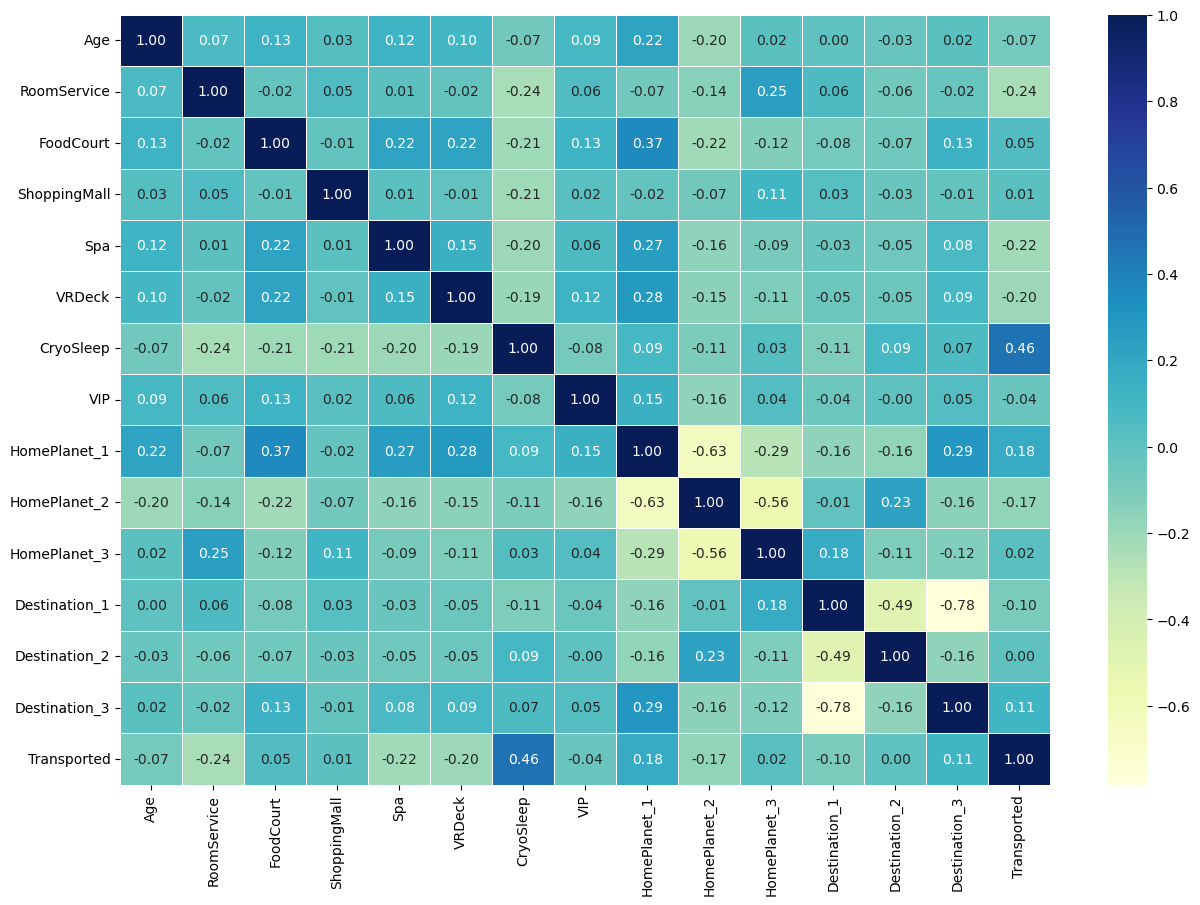

In [34]:
# Lets make our correlation matrix a little pettier
import seaborn as sns
corr_matrix = train_data_process.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

## Modeling

In [35]:
# Splitting the data
X  = train_data_process.drop('Transported', axis=1)
y = train_data_process['Transported']

In [36]:
X.shape

(8693, 14)

In [37]:
X

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP,HomePlanet_1,HomePlanet_2,HomePlanet_3,Destination_1,Destination_2,Destination_3
0,39.0,0.0,0.0,0.0,0.0,0.0,1,1,True,False,False,True,False,False
1,24.0,109.0,9.0,25.0,549.0,44.0,1,1,False,True,False,True,False,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,1,2,True,False,False,True,False,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,1,1,True,False,False,True,False,False
4,16.0,303.0,70.0,151.0,565.0,2.0,1,1,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,1,2,True,False,False,False,False,True
8689,18.0,0.0,0.0,0.0,0.0,0.0,2,1,False,True,False,False,True,False
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1,1,False,True,False,True,False,False
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,1,1,True,False,False,False,False,True


In [38]:
y.shape

(8693,)

In [39]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP,HomePlanet_1,HomePlanet_2,HomePlanet_3,Destination_1,Destination_2,Destination_3
2333,28.0,0.000000,55.0,0.0,656.0,0.0,1,1,False,True,False,True,False,False
2589,17.0,0.000000,1195.0,31.0,0.0,0.0,1,1,False,True,False,True,False,False
8302,28.0,0.000000,0.0,0.0,0.0,0.0,2,1,True,False,False,False,False,True
8177,20.0,224.687617,2.0,289.0,976.0,0.0,1,1,False,False,True,True,False,False
500,36.0,0.000000,0.0,0.0,0.0,0.0,2,1,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,18.0,14.000000,2.0,144.0,610.0,0.0,1,1,False,True,False,True,False,False
5191,50.0,690.000000,0.0,30.0,762.0,428.0,1,1,False,False,True,True,False,False
5390,22.0,158.000000,0.0,476.0,0.0,26.0,1,1,False,True,False,False,True,False
860,34.0,379.000000,0.0,1626.0,0.0,0.0,1,1,False,False,True,True,False,False


Now we've got our data split into training and test sets, it's time to a machine learning model.

We'll train it(find patterns) on the training set.


And we'll test it(use the patterns) on the test set.

We're going to try 3 machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [41]:
# Put models to a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest Classifier": RandomForestClassifier()}

# Creating a funtion to fit and score models
def fit_and_score_models(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of diff Scikit-Learn machine learning models
    X_train: Training data(no labels)
    X_test: Testing data(no labels)
    y_train: Training labels
    y_test: Testing labels
    """
    # Random Seed
    np.random.seed(42)
    
    # A dictionary to store the scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        #Fit the model with train data
        model.fit(X_train, y_train)
        # Score the model with test data
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [42]:
model_scores = fit_and_score_models(models = models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

C:\Users\Harshith-Raj\space-titanic\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7780333525014376,
 'KNN': 0.7630822311673375,
 'Random Forest Classifier': 0.7694077055779184}

## Model Comparision

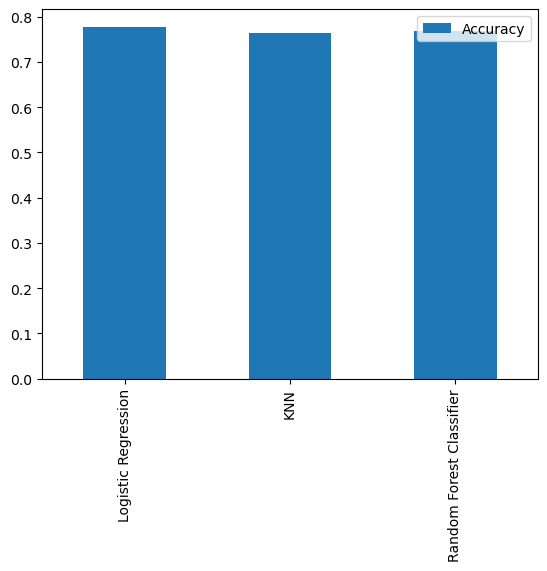

In [43]:
model_compare = pd.DataFrame(model_scores, index = ["Accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model with some Accuracy score let's try to increase the score by further Tuning the model.

## Hyperparameter Tuning

In [44]:
# Lets tune the KNN
train_scores = []
test_scores = []

# List of diff n_neighbors
neighbors = range(1,21)

# model instance
knn = KNeighborsClassifier()

# Looping through
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Score the model on train set
    train_scores.append(knn.score(X_train, y_train))
    
    # Score the model on test set
    test_scores.append(knn.score(X_test, y_test))

In [45]:
train_scores

[0.917169974115617,
 0.8175150992234685,
 0.8390854184641933,
 0.813920046016681,
 0.8192407247627265,
 0.8149266609145815,
 0.813920046016681,
 0.8119068162208801,
 0.8134886396318666,
 0.8133448375035951,
 0.8129134311187806,
 0.8114754098360656,
 0.8078803566292782,
 0.8094621800402646,
 0.8068737417313776,
 0.8055795225769341,
 0.8064423353465632,
 0.8039976991659477,
 0.8029910842680472,
 0.8029910842680472]

In [46]:
test_scores

[0.7291546866014951,
 0.7320299022426682,
 0.7441058079355952,
 0.745830937320299,
 0.7630822311673375,
 0.7630822311673375,
 0.772857964347326,
 0.7671075330649799,
 0.7786083956296722,
 0.7722829212190915,
 0.7734330074755607,
 0.7740080506037953,
 0.7740080506037953,
 0.7699827487061529,
 0.7734330074755607,
 0.7722829212190915,
 0.7757331799884991,
 0.7711328349626222,
 0.7722829212190915,
 0.7763082231167338]

Maximum score on training data set:  77.86%


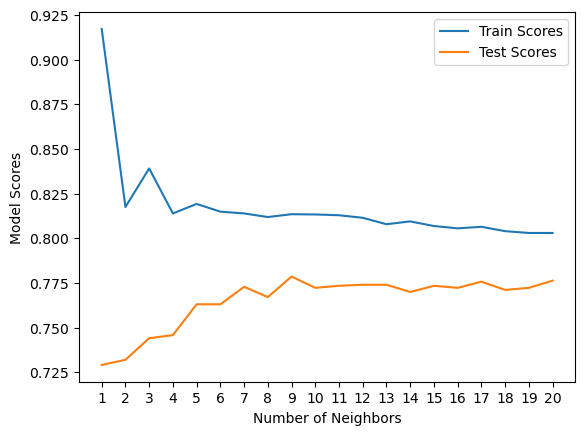

In [47]:
plt.plot(neighbors, train_scores, label = "Train Scores")
plt.plot(neighbors, test_scores, label = "Test Scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Scores")
plt.legend()

print(f"Maximum score on training data set:  {max(test_scores)*100:.2f}%")

## Hyperparameter Tuning

We are gonna tune these two models,
* `Logistic Regression`
* `Random Forest  Classifier`
..usng RandomizedSearchCV

In [48]:
 # Create a hyperparameter grid for LogisticRegression()
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier()
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got parameter grids lets tune the model using  RandomizedSearchCV


In [49]:
# Tune Logistic Model
np.random.seed(42)

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

# Setup random hyperparameter search for LogisticRegression()
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

# Fit random hyperparameter search model for LogisticRegression()
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [50]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.012742749857031334}

In [51]:
rs_log_reg.score(X_test, y_test)

0.777458309373203

In [52]:
# Tune Random Forest Model
np.random.seed(42)

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

# Setup random hyperparameter search for LogisticRegression()
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv = 5,
                                n_iter = 20,
                               verbose = True)

# Fit random hyperparameter search model for LogisticRegression()
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [53]:
rs_rf.best_params_

{'n_estimators': 810,
 'min_samples_split': 2,
 'min_samples_leaf': 13,
 'max_depth': None}

In [54]:
rs_rf.score(X_test, y_test)

0.7883841288096607

In [55]:
model_scores

{'Logistic Regression': 0.7780333525014376,
 'KNN': 0.7630822311673375,
 'Random Forest Classifier': 0.7694077055779184}

## Hyperparaameter tuning with GridSearchCV

Since our RandomForestClassifier model provides the best scores so far, we''ll try and improve them by again using `GridSearchCV()`

In [57]:
# Create a grid with best params
rs_rf_grid = {'n_estimators': [810],
           'min_samples_split': [2],
           'min_samples_leaf': [13],
           'max_depth': [None]}


# Setup grid hyperparameter search for LogisticRegression
gs_rf = GridSearchCV(RandomForestClassifier(),
                         param_grid=rs_rf_grid,
                         cv=5,
                         verbose=True)

# Fit the model
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'min_samples_leaf': [13],
                         'min_samples_split': [2], 'n_estimators': [810]},
             verbose=True)

In [58]:
gs_rf.score(X_test, y_test)

0.7889591719378953

In [71]:
y_preds = gs_rf.predict(X_test)

In [73]:
y_preds[:10]

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [76]:
np.array(y_test[:10])

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [77]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[644 217]
 [150 728]]


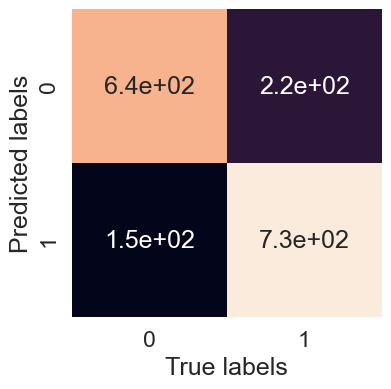

In [78]:
# Plot the confusion matrix with seaborn
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborns heatmap()
    """
    
    fgi, ax = plt.subplots(figsize = (4, 4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True labels")
    plt.ylabel("Predicted labels")

plot_conf_mat(y_test, y_preds)

### Calculate evaluatin metrics using cross-validation

we're going to calculae accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score`

In [79]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 13,
 'min_samples_split': 2,
 'n_estimators': 810}

In [80]:
# Create a new model with best params
clf = RandomForestClassifier(max_depth=None,
                            min_samples_leaf=13,
                             min_samples_split=2,
                             n_estimators=810)

In [81]:
# Cross validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.78895917, 0.78320874, 0.79125934, 0.80955121, 0.80724971])

In [82]:
cv_acc = np.mean(cv_acc)

In [83]:
cv_acc

0.7960456355285334

In [85]:
# Submitting to Kaggle (formatting)
submission = pd.read_csv('data/sample_submission.csv')
features_test = np.array(test_data_process)
y_test_pred = gs_rf.predict(features_test)

C:\Users\Harshith-Raj\space-titanic\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [86]:
y_test_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [87]:
submission['Transported'] = y_test_pred.astype(bool)
submission.to_csv('data/submission.csv', index=False)